In [241]:
import pytorch_lightning as pl
import textdistance as td
import numpy as np
import argparse
import torch
from torch import nn
import torch.nn.functional as F
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

from tokenizers import ByteLevelBPETokenizer

from tokenizers.processors import BertProcessing
import pandas as pd



from transformers import (

    GPT2Tokenizer,
    GPT2LMHeadModel
)

from transformers import (

    GPT2Tokenizer,
    GPT2LMHeadModel,

)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/weijiechua/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [242]:
import numpy as np

In [243]:
from transformers import (

    GPT2Tokenizer,
    GPT2LMHeadModel
)

from transformers import (

    GPT2Tokenizer,
    GPT2LMHeadModel,

)

#Load pre-trained GPT2 language model weights
with torch.no_grad():
    gptmodel = GPT2LMHeadModel.from_pretrained('gpt2')
    gptmodel.eval()

#Load pre-trained GPT2 tokenizer
gpttokenizer = GPT2Tokenizer.from_pretrained('gpt2')

#simple tokenizer + stemmer
regextokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stemmer = nltk.stem.PorterStemmer()



In [244]:

def get_distance(s1, s2):
    s1 = re.sub(r'[^\w\s]', '', s1.lower()) #preprocess
    s2 = re.sub(r'[^\w\s]', '', s2.lower())
    s1_ws = regextokenizer.tokenize(s1) #tokenize to count tokens later
    s2_ws = regextokenizer.tokenize(s2)
    max_n = len(s1_ws) if len(s1_ws) < len(s2_ws) else len(s2_ws) #the max number of bigrams is the number of tokens in the shorter sentence
    ngram_scores = []
    for i in range(1, max_n+1):
        s1grams = nltk.ngrams(s1.split(), i)
        s2grams = nltk.ngrams(s2.split(), i)
        ngram_scores.append((i^2) * (td.overlap.normalized_distance(s1grams, s2grams))) #we normalize the distance score to be a value between 0 and 10, before raising to i
        normalised_dis = sum(ngram_scores)/(max_n) #normalised
    return normalised_dis


def compute_distances(sentence, dataframe):
    distances = []
    for index, row in dataframe.iterrows():
        df_s = dataframe['sentences'][index] #assuming the dataframe column is called 'sentences'
        distance = get_distance(df_s.lower(), sentence)
        distances.append(distance)
    return distances


def novelty_score(sentence, dataframe):
    if dataframe.empty:
        score = 1.0
    else:
        d_list = compute_distances(sentence, dataframe[:])
        d_score = sum(d_list)
        score = d_score / len(d_list)
        score = score/5.62
    return round(score, 2)

In [245]:
df = pd.read_excel("../data/survey_data/combined_data/sat_data_combined.xlsx", index_col=0)

In [266]:
df

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,I01,I02,I03,I04,J01,J02,J03,J04,J05,K01
0.0,How do you feel?,Can I know if the predicted emotion is correct?,Is the emotion positive or negative?,Let us practice Exercise 9 to overcome negativ...,Do you feel compassionate toward your childhoo...,Amazing! Do you feel you want to protect your ...,Congratulations! You have shown tender compass...,Congratulations! You have shown foresighted co...,"Now, it is time to bring compassion to the nex...",Now it is time for you to use your compassion ...,...,Have you research through existing solutions?,It's okay. Please set a new deadline to yourse...,Is there a reasonably good solution?,Think about how do you plan to achieve this. W...,Have you followed through your solution?,Try to reflect on what went wrong in the secon...,Please find a partner that can complete the so...,What do you feel about your compassion energy?...,Write down a blog post sharing your success st...,"Thank you for your cooperation today, I apprec..."
1.0,How are you feeling?,Is the predicted emotion correct?,Do you feel more positive or negative?,Let us start practicing Exercise 9 to overcome...,Do you feel you are compassionate towards your...,Great job! Do you feel like you want to protec...,Congratulations! You have shown tender compass...,Congratulations! You have shown foresighted co...,"Now, let us bring compassion to next level. Pl...",Now it is time to use compassion energy meanin...,...,Have you thought about some possible solutions?,That's totally fine. Let's set a new deadline ...,Are there any helpful solutions?,Think carefully about how you can achieve your...,Did you follow through with your plan?,Think about why it might have gone differently...,It is important to find a partner that you can...,What are your thoughts on your compassion energy?,Share about your experience and thoughts on yo...,Thank you so much for your time and cooperatio...
2.0,How are you feeling today?,What do you think about the results? Do you th...,Do you think that you are feeling more positiv...,"Now, let's take a moment to go through Exercis...",Are you being kind to your childhood self?,That's wonderful to hear. Between protecting y...,Good news! You have clearly demonstrated some ...,How lovely! You have strong feelings of foresi...,Let's take a step further to develop ourselves...,Why don't we put your compassion skills to goo...,...,Have you researched through the existing solut...,"That is alright. You may set a new deadline, a...",Is there a reasonably good solution?,Visualise how you plan to achieve this. When d...,Have you followed through with your solution?,Try to think back and reflect on what might ha...,You can find a partner to complete the solutio...,What do you feel about your compassion energy?...,Write down a blog post sharing your success st...,"Thanks so much for talking with me, I really h..."
3.0,How are you doing?,Did I predict the right emotion?,Do you feel good or bad?,Let's try Exercise 9 to see if it helps!,Do you feel compassion towards your childhood ...,Great job! Do you feel like protecting your ch...,Nice job! You've shown tender compassion. It i...,Good job! You've shown foresighted compassion ...,Now let's bring your compassion up to the next...,Time to use your compassion for good in the re...,...,Did you research for solutions that exist today?,"That is fine! However, please set a deadline, ...",Is there a decent solution?,Think about a plan on how you can achieve this...,Did you commit and follow through your solution?,What went wrong in the second stage?,You can start looking for a partner that can c...,What is your feeling towards compassion energy...,Let us write down a blog post discussing your ...,Thank you for today. See you again soon.
4.0,How are you feeling right now?,Did I guess your emotion correctly?,Are you feeling positive or negative?,Let’s do Exercise 9 together to get over the n...,Do you feel compassion towards your childhood

In [246]:
df = df.iloc[:10]

In [247]:
df_col = list(df['A01'].dropna().values)

In [248]:
curr_sentence = df_col[0]

In [249]:
prev_df = pd.DataFrame([curr_sentence],columns=['sentences'])

In [250]:
prev_df['score'] = 0

In [251]:
prev_df

,sentences,score
0,How do you feel?,0


In [252]:
df_columns  = df.columns

In [253]:
#full_empathy_list = []
#full_fluency_list = []
full_novelty_list = []

for i, col in enumerate(df_columns):
    print("==============================Current column: {col}=======================================")
    possible_options = pd.DataFrame(df.loc[:, [col]].dropna())
    best_score = 0
    empathy_list = []
    fluency_list = []
    novelty_list = []
    for index, row in possible_options.iterrows():
        sentence = row.values[0]
        #empathy = classifiers.empathy_score(sentence)
        #fluency = fluency_score(sentence)
        novelty = novelty_score(sentence, prev_df)
        #score = empathy + 0.75*fluency + 2*novelty
        
        #empathy_list.append(empathy.item())
        #fluency_list.append(fluency)
        novelty_list.append(novelty)
        #score = classifiers.get_sentence_score(sentence, prev_df)
        score = novelty
        if score > best_score:
            best_sentence = sentence
            best_score = score
    print(f"Best sentence: {best_sentence}, {'{:.2f}'.format(best_score)}")
    best_score = best_score
    s2 = pd.DataFrame.from_records([{"sentences": best_sentence, "score": best_score}])
    prev_df = pd.concat([prev_df, s2], ignore_index=True)
    #prev_df = prev_df.append({"sentences": best_sentence}, ignore_index=True)
    
    #full_empathy_list.append(empathy_list)
    #full_fluency_list.append(fluency_list)
    full_novelty_list.append(novelty_list)

==============================Current column: {col}=======================================
Best sentence: How are you feeling?, 0.38
==============================Current column: {col}=======================================
Best sentence: Can I know if the predicted emotion is correct?, 0.44
==============================Current column: {col}=======================================
Best sentence: Is the emotion a positive one or a negative one?, 0.60
==============================Current column: {col}=======================================
Best sentence: Let us start practicing Exercise 9 to overcome negative emotions., 0.70
==============================Current column: {col}=======================================
Best sentence: Do you feel you are compassionate towards your childhood self?, 0.72
==============================Current column: {col}=======================================
Best sentence: That's wonderful to hear. Between protecting your childhood self and wanting your child

Best sentence: Great! If you believe that you have shown the traits of foresighted compassion, is it okay if you still do some protocols to see how are we doing?, 2.01
==============================Current column: {col}=======================================
Best sentence: Let us do Exercise 8. This is really helpful!, 0.89
==============================Current column: {col}=======================================
Best sentence: In what ways do you feel like you should help them?, 0.97
==============================Current column: {col}=======================================
Best sentence: Interesting! It seems like you have foresighted compassion and you probably anticipate the child to handle the issue in a mature manner. You are able to come up with permanent solutions that are beneficial in the long run. Now, let's proceed to MAIN NODE. , 2.37
==============================Current column: {col}=======================================
Best sentence: Now think about this. Sometimes chi

Best sentence: It is important to find a partner that you can go through this journey with, so that you can hold each other accountable. Get started as soon as today., 1.96
==============================Current column: {col}=======================================
Best sentence: How do you feel about your compassion energy? How do you feel about them? Write it down., 1.43
==============================Current column: {col}=======================================
Best sentence: Let us write down a blog post discussing your success story. Discuss your ideas, actions, commitments, what you learn from, and your general feeling about compassion energy. And share them to the forum so that others can learn about it!, 2.24
==============================Current column: {col}=======================================
Best sentence: Thank you so much for your time and cooperation today, I hope you enjoyed our session. I look forward to seeing you next time., 1.78


In [254]:
#import itertools
#full_novelty_list2 = list(itertools.chain(*full_novelty_list))

In [255]:
full_novelty_list

[[0.0, 0.38, 0.38, 0.38, 0.38, 0.38, 0.0, 0.0, 0.32, 0.38],
 [0.44, 0.44, 0.33, 0.44, 0.44, 0.44, 0.36, 0.34, 0.37, 0.41],
 [0.49, 0.46, 0.55, 0.45, 0.45, 0.6, 0.58, 0.49, 0.49, 0.49],
 [0.69, 0.7, 0.66, 0.69, 0.68, 0.7, 0.7, 0.66, 0.7, 0.68],
 [0.63, 0.72, 0.64, 0.63, 0.63, 0.72, 0.72, 0.63, 0.53, 0.63],
 [0.75, 0.76, 0.77, 0.76, 0.76, 0.76, 0.76, 0.76, 0.77, 0.76],
 [1.03, 1.05, 1.03, 1.0, 1.04, 1.03, 1.03, 1.03, 1.04, 1.03],
 [1.26, 1.21, 1.25, 1.26, 1.18, 1.24, 1.26, 1.25, 1.27, 1.15],
 [1.49, 1.47, 1.5, 1.48, 1.37, 1.5, 1.49, 1.49, 1.49, 1.37],
 [1.69, 1.5, 1.65, 1.43, 1.5, 1.56, 1.68, 1.69, 1.36, 1.68],
 [1.11, 1.06, 1.59, 1.16, 0.95, 1.11, 1.11, 1.11, 1.32, 1.0],
 [1.98, 1.98, 1.99, 1.99, 1.96, 1.99, 1.99, 1.98, 1.98, 1.98],
 [1.46, 1.46, 1.46, 1.07, 1.27, 1.31, 1.42, 1.46, 1.5, 0.91],
 [0.88, 0.84, 0.72, 0.72, 0.72, 0.83, 0.88, 0.88, 0.87, 0.98],
 [1.77, 1.82, 2.06, 1.8, 1.44, 1.68, 1.77, 1.77, 1.28, 1.61],
 [0.86, 0.86, 1.54, 0.86, 0.75, 1.07, 0.86, 0.86, 0.86, 1.14],
 [2.15, 

In [256]:
full_novelty_list_np = np.array(full_novelty_list)

In [257]:
full_novelty_list_np[0]

array([0.  , 0.38, 0.38, 0.38, 0.38, 0.38, 0.  , 0.  , 0.32, 0.38])

In [258]:
np.mean(full_novelty_list, axis=1)

array([0.26 , 0.401, 0.505, 0.686, 0.648, 0.761, 1.031, 1.233, 1.465,
       1.574, 1.152, 1.982, 1.332, 0.832, 1.7  , 0.966, 2.012, 1.107,
       1.891, 2.013, 2.234, 1.702, 2.342, 0.844, 1.621, 1.315, 1.709,
       1.711, 2.053, 1.462, 1.892, 0.572, 0.844, 2.298, 2.483, 2.239,
       1.896, 1.207, 0.955, 1.24 , 1.295, 1.083, 1.189, 1.085, 1.891,
       1.127, 1.177, 0.918, 0.755, 0.839, 1.713, 2.144, 1.592, 2.39 ,
       2.269, 0.642, 1.205, 0.625, 2.05 , 0.658, 1.035, 1.619, 1.155,
       1.991, 1.253])

In [259]:
np_max = np.max(full_novelty_list, axis=1)

In [260]:
np_min = np.min(full_novelty_list, axis=1)

In [261]:
np_diff = np_max - np_min

In [262]:
np_diff

array([0.38, 0.11, 0.15, 0.04, 0.19, 0.02, 0.05, 0.12, 0.13, 0.33, 0.64,
       0.03, 0.59, 0.26, 0.78, 0.79, 0.55, 0.3 , 0.54, 0.5 , 0.28, 0.6 ,
       0.36, 0.51, 0.48, 0.2 , 0.85, 0.29, 0.87, 0.45, 0.25, 0.47, 0.35,
       0.15, 0.04, 0.3 , 0.61, 0.49, 0.59, 0.43, 0.55, 0.58, 0.44, 0.59,
       0.7 , 0.86, 0.8 , 0.36, 0.32, 0.86, 0.6 , 0.44, 0.44, 0.  , 0.2 ,
       0.2 , 0.4 , 0.32, 0.38, 0.31, 0.83, 0.87, 0.67, 0.52, 1.  ])

In [263]:
import seaborn as sns

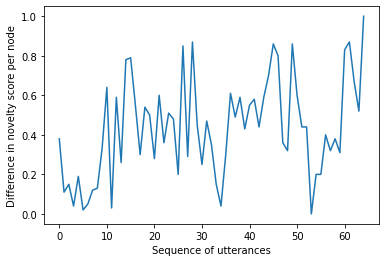

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(data = np_diff)
ax.set(xlabel='Sequence of utterances', ylabel='Difference in novelty score per node')
plt.show()

## Original Graph

In [286]:
def get_distance(s1, s2):
    s1 = re.sub(r'[^\w\s]', '', s1.lower()) #preprocess
    s2 = re.sub(r'[^\w\s]', '', s2.lower())
    s1_ws = regextokenizer.tokenize(s1) #tokenize to count tokens later
    s2_ws = regextokenizer.tokenize(s2)
    max_n = len(s1_ws) if len(s1_ws) < len(s2_ws) else len(s2_ws) #the max number of bigrams is the number of tokens in the shorter sentence
    ngram_scores = []
    for i in range(1, max_n+1):
        s1grams = nltk.ngrams(s1.split(), i)
        s2grams = nltk.ngrams(s2.split(), i)
        #print("normalised")
        #print((td.overlap.normalized_distance(s1grams, s2grams)))
        ngram_scores.append((td.overlap.normalized_distance(s1grams, s2grams))**i) #we normalize the distance score to be a value between 0 and 10, before raising to i
        print(ngram_scores)
        
        normalised_dis = sum(ngram_scores)/(max_n) #normalised
        print(normalised_dis)
    return normalised_dis


def compute_distances(sentence, dataframe):
    distances = []
    for index, row in dataframe.iterrows():
        df_s = dataframe['sentences'][index] #assuming the dataframe column is called 'sentences'
        distance = get_distance(df_s.lower(), sentence)
        distances.append(distance)
    return distances


def novelty_score(sentence, dataframe):
    if dataframe.empty:
        score = 1.0
    else:
        d_list = compute_distances(sentence, dataframe[:])
        d_score = sum(d_list)
        score = d_score / len(d_list)
    return round(score, 2)

In [287]:
get_distance("How do you feel?", "Can I know if the predicted emotion is correct?")

[1.0]
0.25
[1.0, 1.0]
0.5
[1.0, 1.0, 1.0]
0.75
[1.0, 1.0, 1.0, 1.0]
1.0


1.0

In [233]:
df = pd.read_excel("../data/survey_data/combined_data/sat_data_combined.xlsx", index_col=0)

df = df.iloc[:10]

df_col = list(df['A01'].dropna().values)

curr_sentence = df_col[0]

prev_df = pd.DataFrame([curr_sentence],columns=['sentences'])

prev_df['score'] = 0

prev_df

df_columns  = df.columns

In [234]:


#full_empathy_list = []
#full_fluency_list = []
full_novelty_list = []

for i, col in enumerate(df_columns):
    print("==============================Current column: {col}=======================================")
    possible_options = pd.DataFrame(df.loc[:, [col]].dropna())
    best_score = 0
    empathy_list = []
    fluency_list = []
    novelty_list = []
    for index, row in possible_options.iterrows():
        sentence = row.values[0]
        #empathy = classifiers.empathy_score(sentence)
        #fluency = fluency_score(sentence)
        novelty = novelty_score(sentence, prev_df)
        #score = empathy + 0.75*fluency + 2*novelty
        
        #empathy_list.append(empathy.item())
        #fluency_list.append(fluency)
        novelty_list.append(novelty)
        #score = classifiers.get_sentence_score(sentence, prev_df)
        score = novelty
        if score > best_score:
            best_sentence = sentence
            best_score = score
    print(f"Best sentence: {best_sentence}, {'{:.2f}'.format(best_score)}")
    best_score = best_score
    s2 = pd.DataFrame.from_records([{"sentences": best_sentence, "score": best_score}])
    prev_df = pd.concat([prev_df, s2], ignore_index=True)
    #prev_df = prev_df.append({"sentences": best_sentence}, ignore_index=True)
    
    #full_empathy_list.append(empathy_list)
    #full_fluency_list.append(fluency_list)
    full_novelty_list.append(novelty_list)



==============================Current column: {col}=======================================
Best sentence: How are you feeling?, 0.88
==============================Current column: {col}=======================================
Best sentence: Can I know if the predicted emotion is correct?, 1.00
==============================Current column: {col}=======================================
Best sentence: Is the emotion a positive one or a negative one?, 0.99
==============================Current column: {col}=======================================
Best sentence: Let us practice Exercise 9 to overcome negative emotions., 1.00
==============================Current column: {col}=======================================
Best sentence: Are you being kind to your childhood self?, 0.93
==============================Current column: {col}=======================================
Best sentence: That's wonderful to hear. Between protecting your childhood self and wanting your childhood self to grow stronger f

Best sentence: Congratulations! You have shown foresighted compassion, where you expect the child to deal with the situation maturely. You have developed the capability to develop long-term sustainable solutions. Let us move to MAIN NODE to make meaningful actions., 0.98
==============================Current column: {col}=======================================
Best sentence: Consider this - children sometimes throw tantrums when they are upset and don't get their way. Thus, the responsibility falls on our adult self to teach them to handle it maturely. Let's carry out exercises 17 and 18 (to identify personal resentment and commit to constructive actions)., 0.99
==============================Current column: {col}=======================================
Best sentence: Do you think that the best solution is something that comes to mind immediately as it is something the child wants? Or do you think that the situation calls for a more complicated solution that requires discipline and/or ma

<AxesSubplot:>

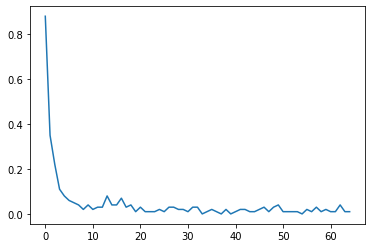

In [235]:
full_novelty_list

full_novelty_list_np = np.array(full_novelty_list)

full_novelty_list_np[0]

np.mean(full_novelty_list, axis=1)

np_max = np.max(full_novelty_list, axis=1)

np_min = np.min(full_novelty_list, axis=1)

np_diff = np_max - np_min

np_diff



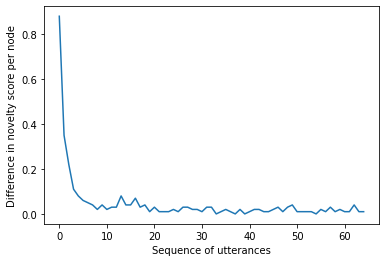

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(data = np_diff)
ax.set(xlabel='Sequence of utterances', ylabel='Difference in novelty score per node')
plt.show()